# Campus Recruitment

Dataset ชุดนี้เป็นข้อมูลการจ้างงานของสถาบันการศึกษาแห่งหนึ่ง ซี่งมีข้อมูลการศึกษาของผู้สมัคร ความเชี่ยวชาญ ประสบการณ์การทำงาน ผลการสอบเข้าทำงาน และผลการรับเข้าทำงาน (status)

## Data Description

| Variables | Definition |
| --------- | ---------- |
| sl_no | Serial Number |
| gender | Gender- Male='M',Female='F' |
| ssc_p | Secondary Education percentage- 10th Grade |
| ssc_b | Board of Education (Secondary Education)- Central/ Others |
| hsc_p | Higher Secondary Education percentage- 12th Grade |
| hsc_b | Board of Education (Higher Secondary Education)- Central/ Others |
| hsc_s | Specialization in Higher Secondary Education |
| degree_p | Degree Percentage |
| degree_t | Under Graduation(Degree type)- Field of degree education |
| workex | Work Experience |
| etest_p | Employability test percentage (conducted by college) |
| specialisation | Post Graduation(MBA)- Specialization |
| mba_p | MBA percentage |
| status | Status of placement- Placed/Not placed |

## Objective:

- Explore data และ สร้าง classification model เพื่อทำนายผลการรับเข้าทำงาน (status)
- ปัจจัยใดบ้างที่มีผลต่อการรับเข้าทำงาน (3 อันดับแรก)

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [5]:
df.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed


In [6]:
df.sample(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
103,104,M,73.0,Central,78.0,Central,Science,73.00,Sci&Tech,Yes,85.00,Mkt&HR,65.83,Placed
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed
95,96,M,73.0,Central,78.0,Others,Commerce,65.00,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed
63,64,M,61.0,Others,70.0,Others,Commerce,64.00,Comm&Mgmt,No,68.50,Mkt&HR,59.50,Not Placed
130,131,M,62.0,Central,65.0,Others,Commerce,60.00,Comm&Mgmt,No,84.00,Mkt&Fin,64.15,Not Placed


In [7]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


## แยกชื่อ columns ที่เป็น categorical กับ numerical เก็บไว้ใน array

In [9]:
num_cols = []
cat_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat_cols.append(col)
    else:
        num_cols.append(col)

In [10]:
m_p = len(df[ (df['gender']=='M') & (df['status']=='Placed') ])
m_n = len(df[ (df['gender']=='M') & (df['status']=='Not Placed') ])
f_p = len(df[ (df['gender']=='F') & (df['status']=='Placed') ])
f_n = len(df[ (df['gender']=='F') & (df['status']=='Not Placed') ])

print(f'อัตราการรับผู้ชายเข้า = {m_p/(m_p + m_n)}')
print(f'อัตราการรับผู้หญิงเข้า = {f_p/(f_p + f_n)}')

อัตราการรับผู้ชายเข้า = 0.7194244604316546
อัตราการรับผู้หญิงเข้า = 0.631578947368421


## pairplot ข้อมูลที่เป็น numerical ยกเว้น 'sl_no' ที่เป็น identifier

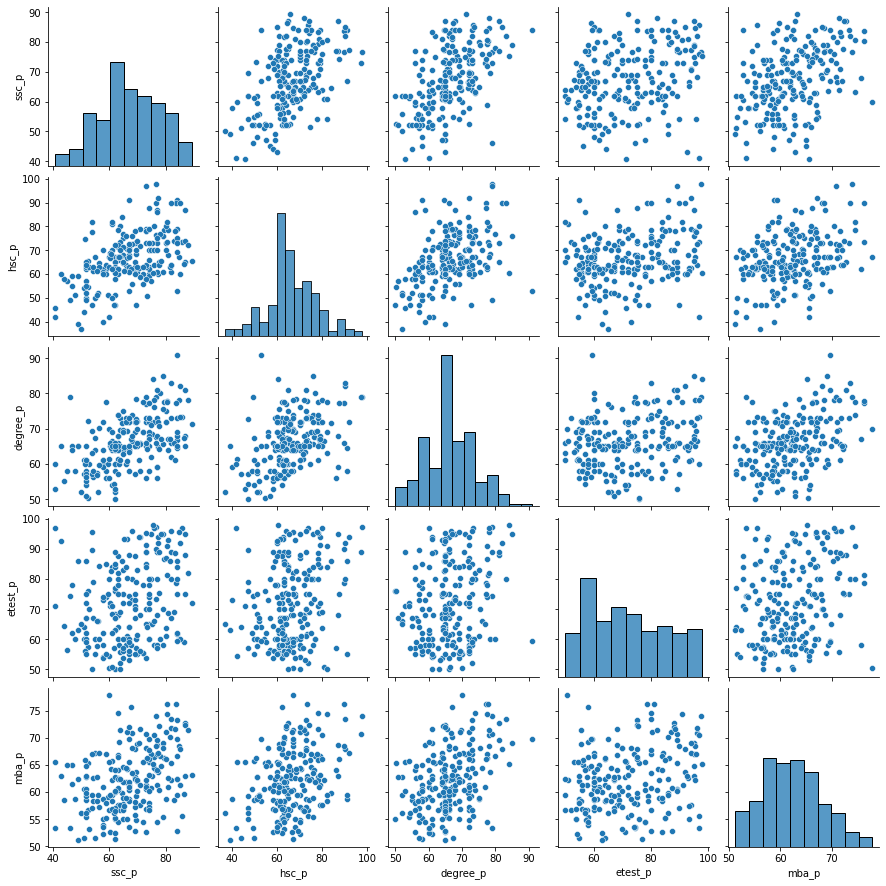

In [11]:
sns.pairplot(df[num_cols[1:]])

## plot ดู distribution ของ categorical data

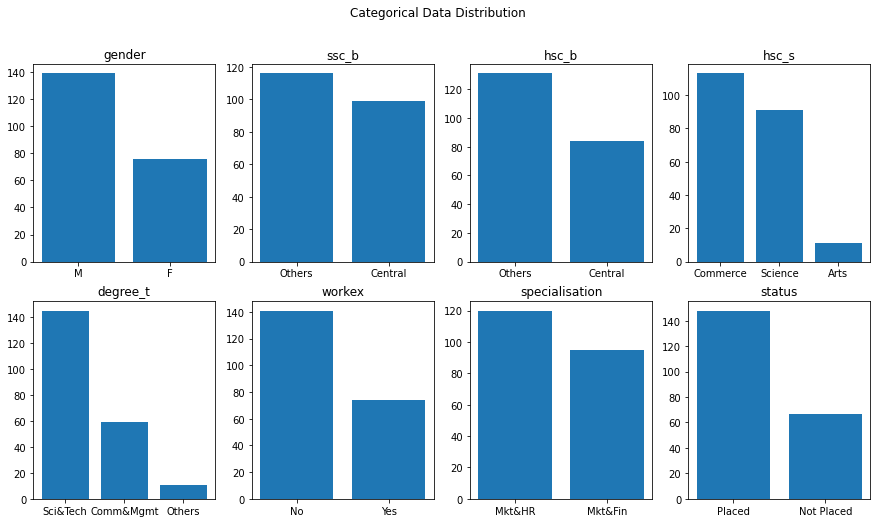

In [12]:
fig_cat, ax_cat = plt.subplots(2, 4, figsize=(15, 8))
fig_cat.suptitle('Categorical Data Distribution')

i = 0
for ax_r in ax_cat:
    for ax in ax_r:
        ax.set_title(cat_cols[i])
        ax.bar(df[cat_cols[i]].unique(), df[cat_cols[i]].value_counts())
        i += 1

## ดู Missing Values

In [13]:
null_values = df.isnull().sum()
null_values

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

# Preprocessing data
## Categorical data
## One-hot encoding

In [14]:
one_hot = {}
one_hot_df = df.copy()
for col in cat_cols:
    one_hot[col] = pd.get_dummies(df[col], prefix=col)
    one_hot_df = one_hot_df.drop(col,axis=1)

for h in one_hot.values() : 
    one_hot_df = pd.concat([one_hot_df, h], axis = 1)
one_hot_df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,0,1,0,1,...,0,0,0,1,1,0,0,1,0,1
1,2,79.33,78.33,77.48,86.5,66.28,0,1,1,0,...,1,0,0,1,0,1,1,0,0,1
2,3,65.00,68.00,64.00,75.0,57.80,0,1,1,0,...,0,1,0,0,1,0,1,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,0,1,1,0,...,1,0,0,1,1,0,0,1,1,0
4,5,85.80,73.60,73.30,96.8,55.50,0,1,1,0,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
211,212,58.00,60.00,72.00,74.0,53.62,0,1,0,1,...,1,0,0,1,1,0,1,0,0,1
212,213,67.00,67.00,73.00,59.0,69.72,0,1,0,1,...,0,1,0,0,0,1,1,0,0,1
213,214,74.00,66.00,58.00,70.0,60.23,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1


## drop columns categorical ที่มี 2 ประเภท

In [15]:
one_hot_df = one_hot_df.drop(['gender_F', 'ssc_b_Others', 'hsc_b_Others', 'workex_No', 'specialisation_Mkt&Fin', 'status_Not Placed'], axis=1)
one_hot_df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Central,hsc_b_Central,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,1,0,0,0,1,0,0,0,1,0,1,1
1,2,79.33,78.33,77.48,86.5,66.28,1,1,0,0,0,1,0,0,1,1,0,1
2,3,65.00,68.00,64.00,75.0,57.80,1,1,1,1,0,0,1,0,0,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,1,1,1,0,0,1,0,0,1,0,1,0
4,5,85.80,73.60,73.30,96.8,55.50,1,1,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,1,0,0,0,1,0,1,0,0,0,0,1
211,212,58.00,60.00,72.00,74.0,53.62,1,0,0,0,0,1,0,0,1,0,0,1
212,213,67.00,67.00,73.00,59.0,69.72,1,0,0,0,1,0,1,0,0,1,0,1
213,214,74.00,66.00,58.00,70.0,60.23,0,0,0,0,1,0,1,0,0,0,1,1


## Numerical data

## Plot ดู numerical data ก่อน scaling

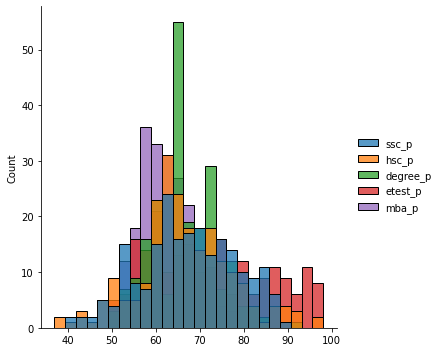

In [16]:
sns.displot(df[df.columns[1:]])

## ลักษณะดู เป็น guassian's normal distribution จึงใช้ StandardScaler

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[num_cols[1:]])
scaled_num_df = pd.DataFrame(scaler.transform(df[num_cols[1:]]), columns=num_cols[1:])
scaled_num_df

,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,-0.028087,2.268812,-1.140102,-1.291091,-0.597647
1,1.113369,1.103448,1.513267,1.087157,0.687620
2,-0.213238,0.153313,-0.322843,0.218908,-0.769474
3,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396
4,1.712332,0.668391,0.943909,1.864806,-1.164676
...,...,...,...,...,...
210,1.230940,1.441008,1.529612,1.426906,2.098321
211,-0.861266,-0.582513,0.766836,0.143408,-1.487711
212,-0.028087,0.061335,0.903046,-0.989091,1.278706
213,0.619941,-0.030644,-1.140102,-0.158592,-0.351934


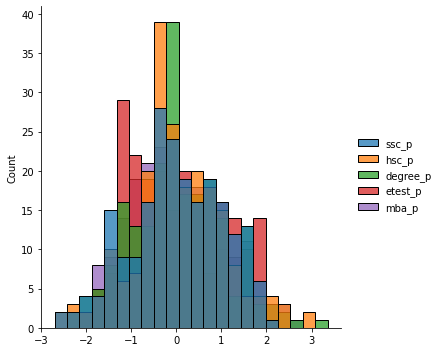

In [18]:
sns.displot(scaled_num_df)

## นำ numerical ที่ scaled มารวมกับ categorical ที่ encoded

In [19]:
preprocessed_df = one_hot_df.copy()
preprocessed_df[num_cols[1:]] = scaled_num_df
preprocessed_df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Central,hsc_b_Central,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,1,-0.028087,2.268812,-1.140102,-1.291091,-0.597647,1,0,0,0,1,0,0,0,1,0,1,1
1,2,1.113369,1.103448,1.513267,1.087157,0.687620,1,1,0,0,0,1,0,0,1,1,0,1
2,3,-0.213238,0.153313,-0.322843,0.218908,-0.769474,1,1,1,1,0,0,1,0,0,0,0,1
3,4,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396,1,1,1,0,0,1,0,0,1,0,1,0
4,5,1.712332,0.668391,0.943909,1.864806,-1.164676,1,1,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1.230940,1.441008,1.529612,1.426906,2.098321,1,0,0,0,1,0,1,0,0,0,0,1
211,212,-0.861266,-0.582513,0.766836,0.143408,-1.487711,1,0,0,0,0,1,0,0,1,0,0,1
212,213,-0.028087,0.061335,0.903046,-0.989091,1.278706,1,0,0,0,1,0,1,0,0,1,0,1
213,214,0.619941,-0.030644,-1.140102,-0.158592,-0.351934,0,0,0,0,1,0,1,0,0,0,1,1


## drop 'sl_no' ทิ้ง เพราะไม่มีประโยชน์ ต่อการทำนาย

In [20]:
preprocessed_df.drop(['sl_no'], axis=1, inplace=True)
preprocessed_df

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Central,hsc_b_Central,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,-0.028087,2.268812,-1.140102,-1.291091,-0.597647,1,0,0,0,1,0,0,0,1,0,1,1
1,1.113369,1.103448,1.513267,1.087157,0.687620,1,1,0,0,0,1,0,0,1,1,0,1
2,-0.213238,0.153313,-0.322843,0.218908,-0.769474,1,1,1,1,0,0,1,0,0,0,0,1
3,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396,1,1,1,0,0,1,0,0,1,0,1,0
4,1.712332,0.668391,0.943909,1.864806,-1.164676,1,1,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1.230940,1.441008,1.529612,1.426906,2.098321,1,0,0,0,1,0,1,0,0,0,0,1
211,-0.861266,-0.582513,0.766836,0.143408,-1.487711,1,0,0,0,0,1,0,0,1,0,0,1
212,-0.028087,0.061335,0.903046,-0.989091,1.278706,1,0,0,0,1,0,1,0,0,1,0,1
213,0.619941,-0.030644,-1.140102,-0.158592,-0.351934,0,0,0,0,1,0,1,0,0,0,1,1


<AxesSubplot:>

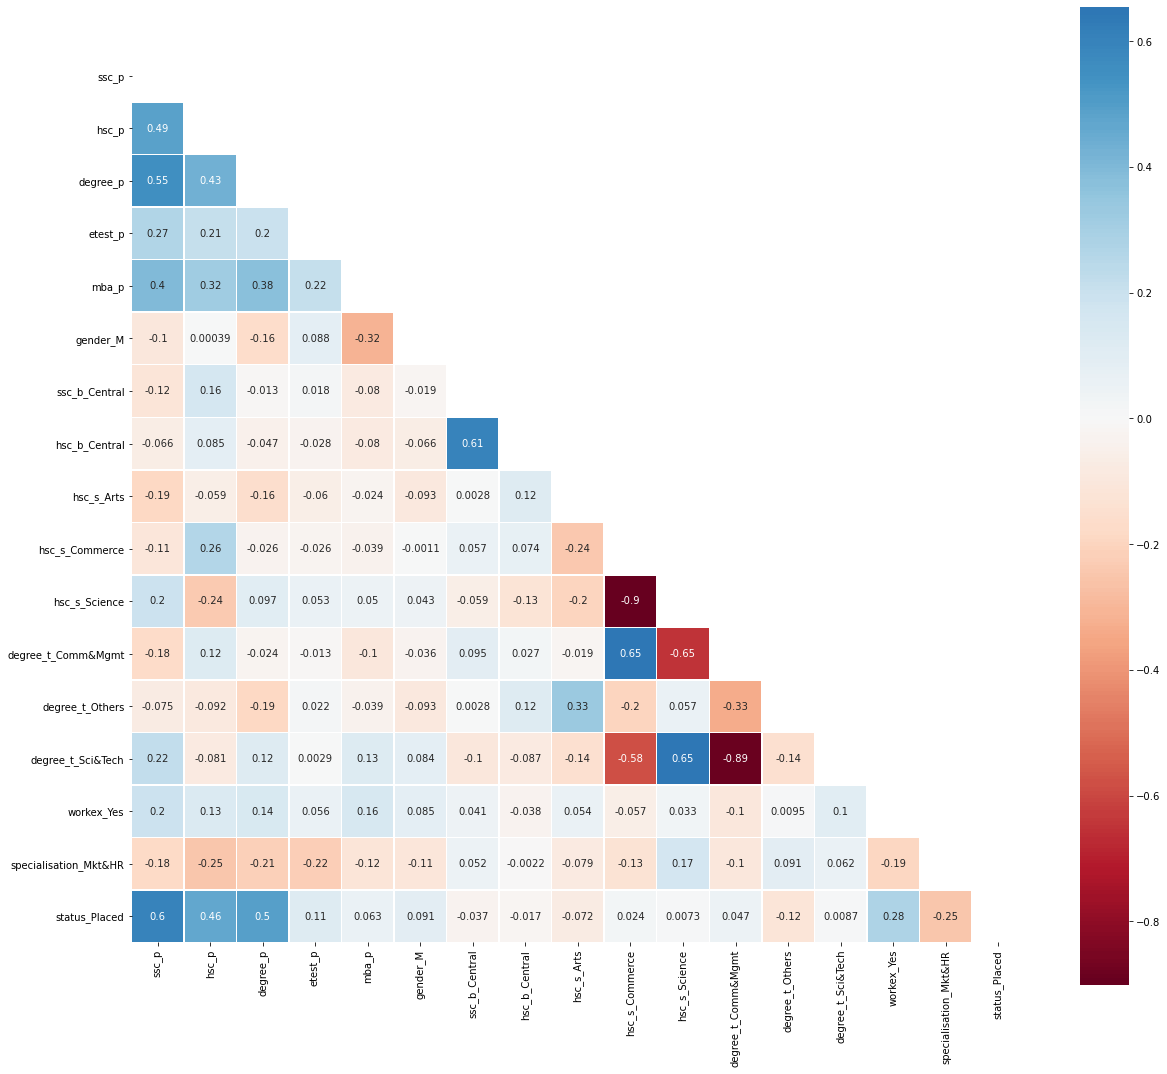

In [21]:
corr = preprocessed_df.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="RdBu", center=0,
            square=True, linewidths=.5)

ดูจาก correlation -> ssc_p, degree_p, hsc_p มี corelation ต่อการรับเข้าทำงาน มากที่สุดตามลำดับ

## แยก features และ label ออกจากกัน

In [22]:
X = preprocessed_df.drop('status_Placed', axis=1)
y = preprocessed_df['status_Placed']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## check ว่า stratify หรือไม่

In [24]:
print('(X_train Male / Male+Female) , (X_test Male / Male+Female)')
X_train[X_train['gender_M'] == 1]['gender_M'].count() / X_train['gender_M'].count(), X_test[X_test['gender_M'] == 1]['gender_M'].count() / X_test['gender_M'].count()

(X_train Male / Male+Female) , (X_test Male / Male+Female)


(0.6511627906976745, 0.627906976744186)

# models selection

In [25]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import plot_roc_curve, accuracy_score, plot_confusion_matrix, f1_score

In [26]:
def cvs(es, cv=5):
    es_cv = cross_val_score(es, X, y, cv=cv)
    for i in range(len(es_cv)):
        print('Fold %s : %s' %(i, es_cv[i]))
    print("Mean cross val score ", np.mean(es_cv))
def roc(es):
    plot_roc_curve(es, X_test, y_test)
    plt.grid()
def tts(es):
    print(f'train set\'s score {es.score(X_train, y_train)}')
    print(f'test set\'s score {es.score(X_test, y_test)}')
def cm(es):
    plot_confusion_matrix(es, X_test, y_test, cmap='Blues', values_format='d')

## Logistic Regression

## Decision Tree

In [46]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10]
}

In [55]:
gs_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_dt, scoring='accuracy', return_train_score=True)
gs_dt.fit(X_train, y_train)
gs_dt.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [29]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [30]:
tts(dt)

train set's score 0.8953488372093024
test set's score 0.6511627906976745


In [31]:
cvs(dt)

Fold 0 : 0.8372093023255814
Fold 1 : 0.7906976744186046
Fold 2 : 0.8604651162790697
Fold 3 : 0.813953488372093
Fold 4 : 0.6976744186046512
Mean cross val score  0.8


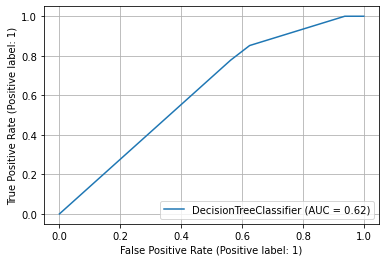

In [32]:
roc(dt)

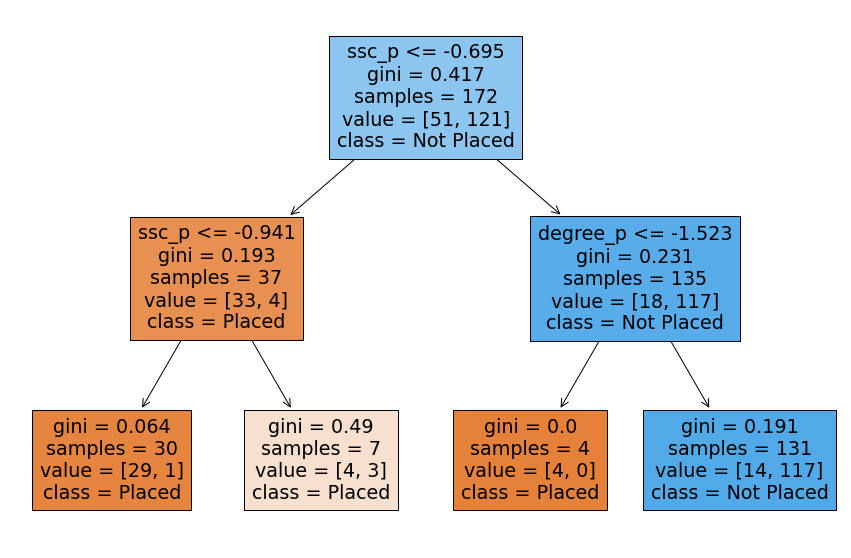

In [33]:
fig = plt.figure(figsize=(15,10))
_ = plot_tree(dt, 
        feature_names=X.columns,  
        class_names=['Placed', 'Not Placed'],
        filled=True)

In [34]:
dt_new = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_new.fit(X_train, y_train)
tts(dt_new)

train set's score 0.9069767441860465
test set's score 0.6976744186046512


In [56]:
cvs(dt_new)

Fold 0 : 0.9069767441860465
Fold 1 : 0.813953488372093
Fold 2 : 0.8372093023255814
Fold 3 : 0.813953488372093
Fold 4 : 0.7209302325581395
Mean cross val score  0.8186046511627907


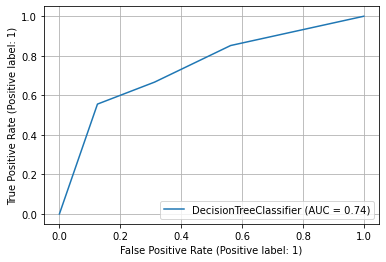

In [35]:
roc(dt_new)

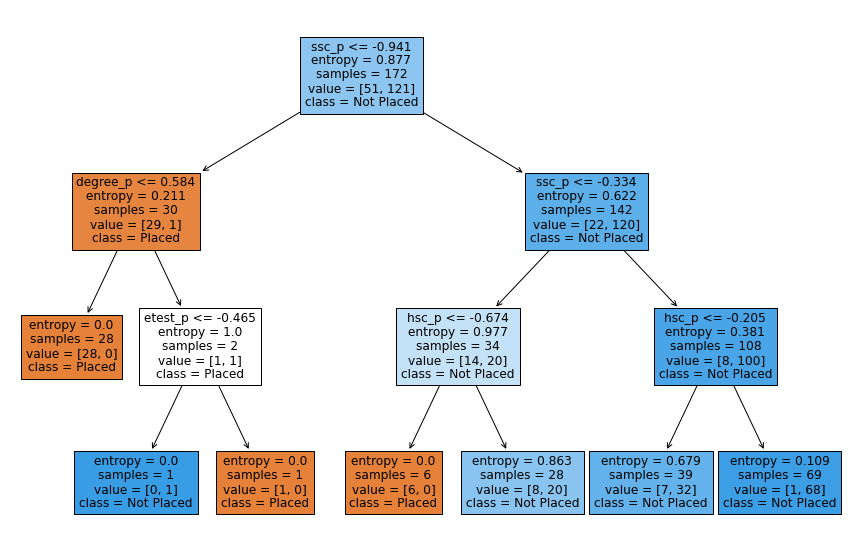

In [36]:
fig = plt.figure(figsize=(15,10))
_ = plot_tree(dt_new, 
        feature_names=X.columns,  
        class_names=['Placed', 'Not Placed'],
        filled=True)

## K Nearest Neighbors

## Support Vector Machine

In [37]:
param_grid_svm = [
    {'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear']},
    {'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']}]

In [38]:
gs_svm = GridSearchCV(SVC(), param_grid=param_grid_svm, scoring='accuracy', return_train_score=True)
gs_svm.fit(X_train, y_train)
gs_svm.best_params_

{'C': 1, 'kernel': 'linear'}

In [39]:
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [40]:
tts(svc)

train set's score 0.9244186046511628
test set's score 0.813953488372093


In [41]:
cvs(svc)

Fold 0 : 0.8837209302325582
Fold 1 : 0.813953488372093
Fold 2 : 0.9302325581395349
Fold 3 : 0.8604651162790697
Fold 4 : 0.8837209302325582
Mean cross val score  0.8744186046511627


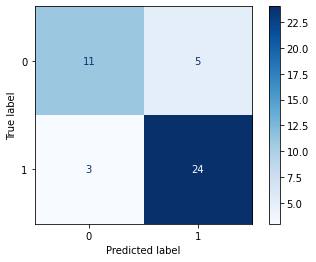

In [42]:
cm(svc)

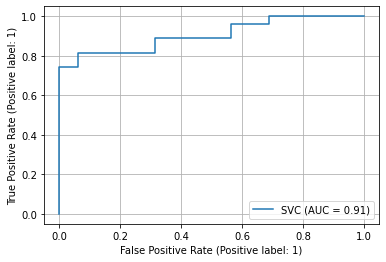

In [43]:
roc(svc)